# Arbitrary functions

In [1]:
import tequila as tq
import numpy

We can realize arbitrary functions of expectation values.  
The primitive objects are `tq.ExpectationValue` and `tq.Variable` which we can combine with
- standard artithmetic operators: `+,-,**,/` e.g. `y = -x**2 + 1.0`
- apply function `y = x.apply(f)` then on evaluation we will have $y \leftarrow f(x)$

here is for example a Gaussian function

$$
f(a) = e^{-a^2}
$$

without any expectation values present yet

In [2]:
a = tq.Variable("a")
g = (-a**2).apply(tq.numpy.exp)
print(g)

Objective with 0 unique expectation values
total measurements = 0
variables          = [a]
types              = []


in the following we initialize an expectation value

$$
E = \langle \sigma_x \rangle_{U(a)}, \quad U(a)= e^{-i\frac{a}{2}\sigma_y}
$$

and combine it with the Gaussian defined above to the function

$$
F = g(a)E(a) + 1.0 = e^{-a^2} \langle \sigma_x \rangle_{U(a)}
$$

In [3]:
U = tq.gates.Rp(angle="a", paulistring="Y(0)")
H = tq.paulis.X(0)
E = tq.ExpectationValue(H=H, U=U)

F = g*E
print(F)

Objective with 1 unique expectation values
total measurements = 1
variables          = [a]
types              = not compiled


Let's see how this looks

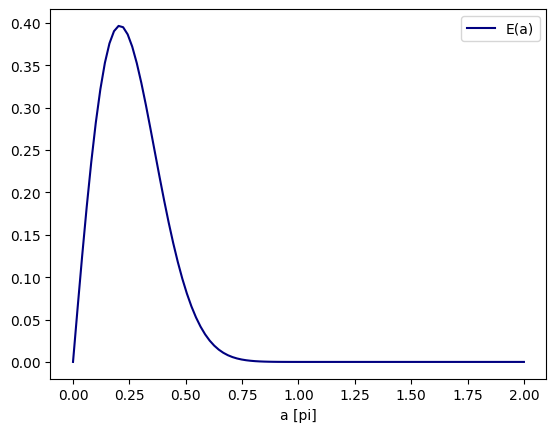

In [4]:
f = tq.compile(F)
from matplotlib import pyplot as plt

# evaluate at different values of the angle "a"
# using units if pi
n=100
step=2/(n-1)
value = 0.0
y = []
x = []
for k in range(n):
    value = k*step
    x.append(value)
    y.append(f({"a":value*numpy.pi}))

plt.plot(x,y,label="E(a)", color="navy")
plt.xlabel("a [pi]")
plt.legend()
plt.show()

We can also use the defined Gaussian function $g$ as variable for our circuit, i.e.

$$
E = \langle \sigma_x \rangle_{U(g(a))}
$$

In [5]:
U = tq.gates.Rp(angle=g, paulistring="Y(0)")
H = tq.paulis.X(0)
E = tq.ExpectationValue(H=H, U=U)

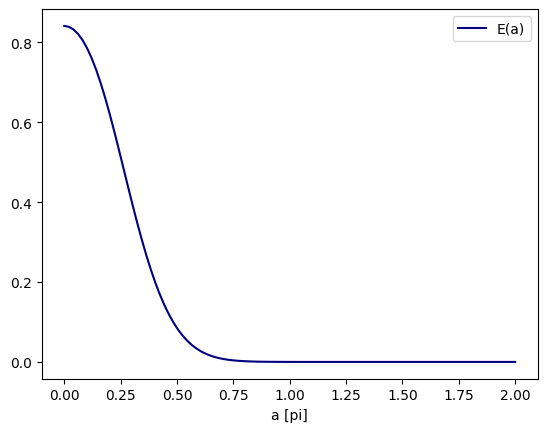

In [6]:
f = tq.compile(E)
from matplotlib import pyplot as plt

# evaluate at different values of the angle "a"
# using units if pi
n=100
step=2/(n-1)
value = 0.0
y = []
x = []
for k in range(n):
    value = k*step
    x.append(value)
    y.append(f({"a":value*numpy.pi}))

plt.plot(x,y,label="E(a)", color="navy")
plt.xlabel("a [pi]")
plt.legend()
plt.show()

## Exercise
Implement the following functions 

- $F_0 = E(a) + \frac{\partial E(a)}{\partial a} $
- $F_1 = (E(a) + \frac{\partial E(a)}{\partial a})^2 $
- $F_2 = E(a^2) + e^{-\frac{\partial E(a)}{\partial a}^2 + 1.0} $

use the $E$ form the begining

In [7]:
F0 = E + tq.grad(E,"a")
F1 = 0.0
F2 = 0.0

## Nested structures

If the variable entering a circuit contains expectation values, it should be compiled before.  
Note that this is not very optimized ... 

In [22]:
U = tq.gates.Rp(angle="a", paulistring="Y(0)")
H = tq.paulis.X(0)
E1 = tq.ExpectationValue(H=H, U=U)

# nested structure that takes E1 as input
U = tq.gates.Rp(angle=tq.compile(E1)*numpy.pi, paulistring="Y(0)")
H = tq.paulis.X(0)
E2 = tq.ExpectationValue(H=H, U=U)

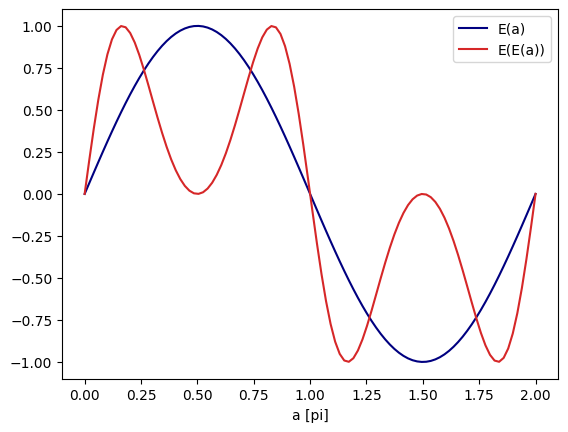

In [23]:
f = tq.compile(E1)
ff = tq.compile(E2)
from matplotlib import pyplot as plt

# evaluate at different values of the angle "a"
# using units if pi
n=100
step=2/(n-1)
value = 0.0
y = []
yy = []
x = []
for k in range(n):
    value = k*step
    x.append(value)
    y.append(f({"a":value*numpy.pi}))
    yy.append(ff({"a":value*numpy.pi}))

plt.plot(x,y,label="E(a)", color="navy")
plt.plot(x,yy,label="E(E(a))", color="tab:red")
plt.xlabel("a [pi]")
plt.legend()
plt.show()